In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv("felicidad2024.csv", sep=",")
df = data[data["year"]==2023]
latin_american_countries = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", 
    "Costa Rica", "Cuba", "Dominican Republic", "Ecuador", 
    "El Salvador", "Guatemala", "Honduras", "Mexico", 
    "Nicaragua", "Panama", "Paraguay", "Peru", 
    "Uruguay", "Venezuela"
]

latam = df[df['Country name'].isin(latin_american_countries)].drop('year', axis=1)
latam

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
63,Argentina,6.393,9.994,0.892,67.3,0.832,-0.129,0.846,0.720,0.301
228,Bolivia,5.860,9.025,0.786,63.9,0.832,-0.059,0.877,0.753,0.401
276,Brazil,6.553,9.635,0.856,66.1,0.870,-0.036,0.733,0.694,0.313
405,Chile,6.230,10.155,0.874,70.6,0.815,-0.027,0.836,0.779,0.263
440,Colombia,5.904,9.667,0.833,69.7,0.823,-0.142,0.870,0.754,0.285
490,Costa Rica,7.384,10.021,0.875,70.0,0.933,-0.067,0.767,0.806,0.282
578,Dominican Republic,5.921,9.900,0.860,64.8,0.867,-0.107,0.667,0.730,0.256
596,Ecuador,5.852,9.307,0.782,69.5,0.731,-0.106,0.840,0.763,0.359
632,El Salvador,6.482,9.167,0.744,66.3,0.942,-0.104,0.496,0.812,0.318
803,Guatemala,6.421,9.140,0.796,63.1,0.873,-0.049,0.812,0.843,0.303


<Axes: >

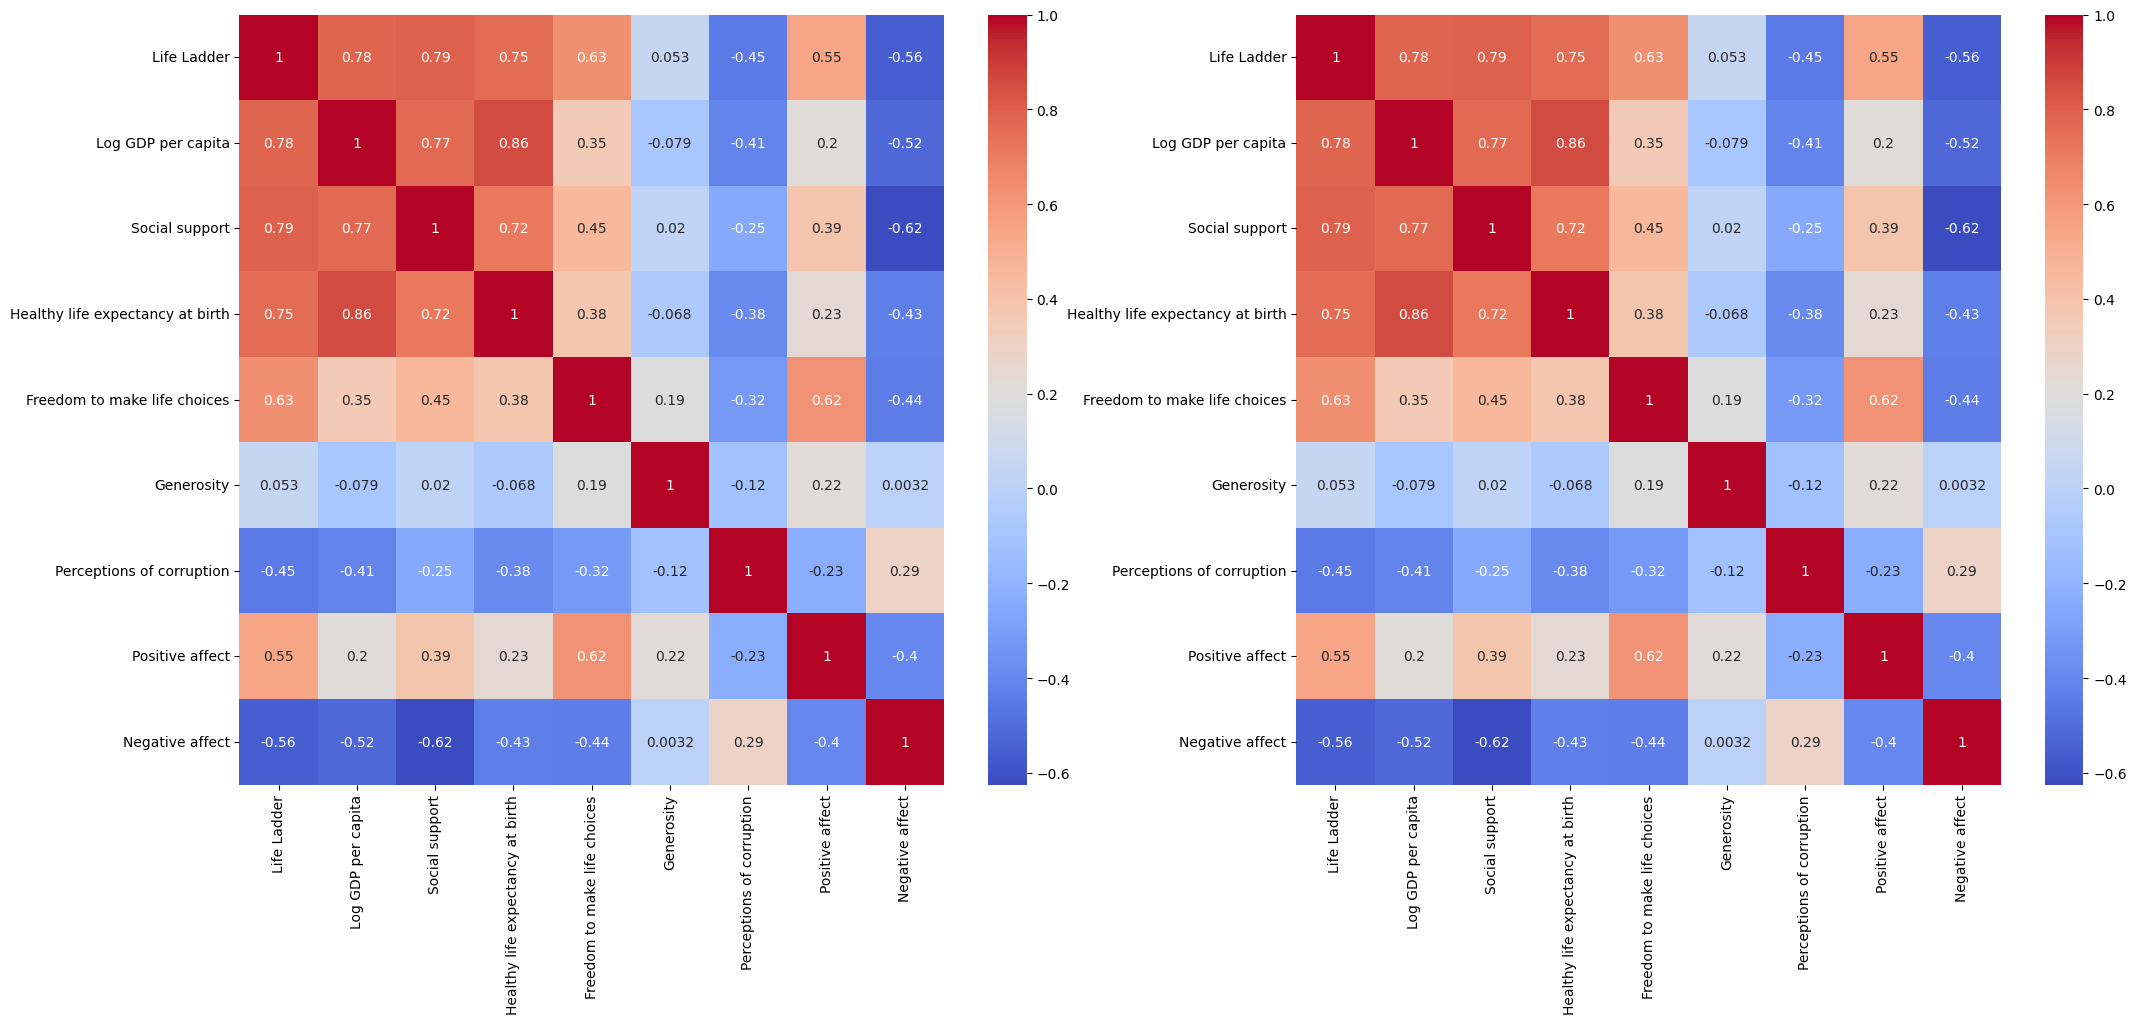

In [40]:
plt.subplots(1,2, figsize=(25,10))
plt.subplot(1,2,1)
coor_mtx = df.drop(['year','Country name'],axis=1).corr()
sns.heatmap(coor_mtx, annot=True, cmap='coolwarm')

plt.subplot(1,2,2)
corr_mtx = latam.drop('Country name',axis=1).corr()
sns.heatmap(coor_mtx, annot=True, cmap='coolwarm')

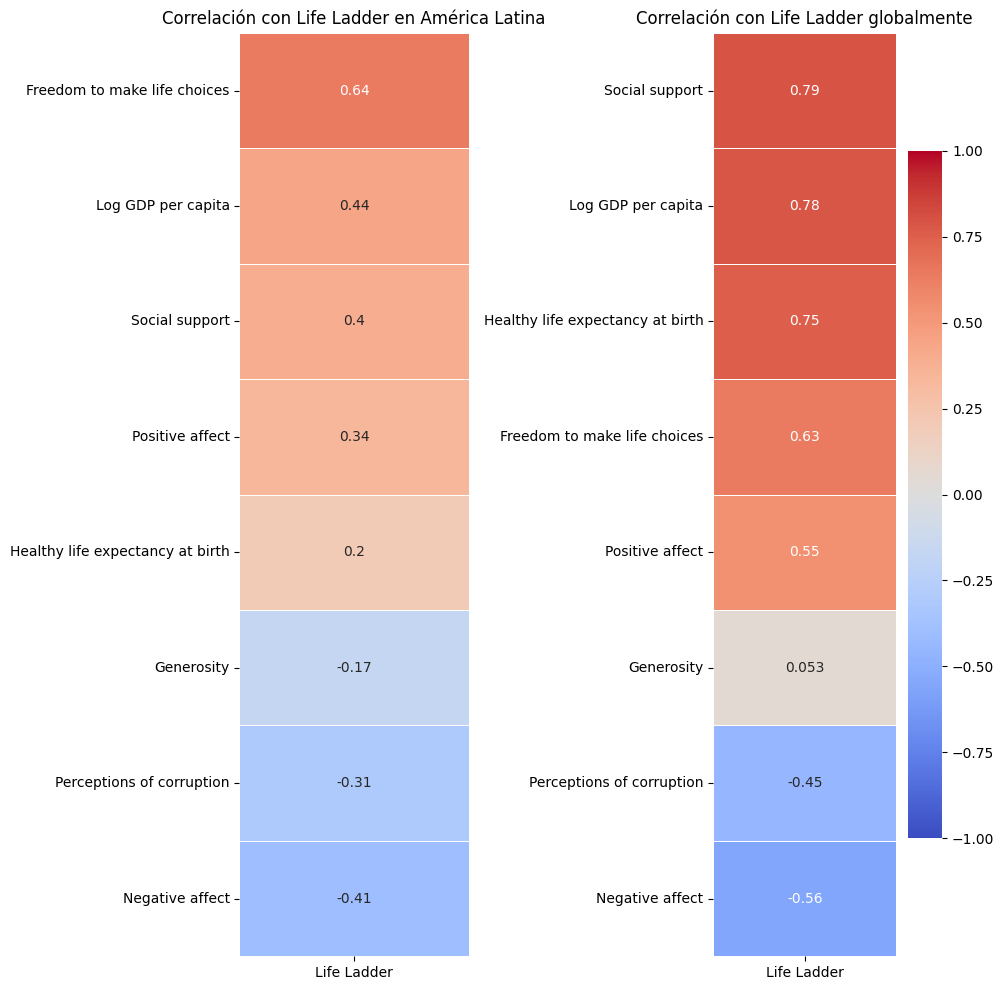

In [87]:
plt.subplots(1, 2, figsize=(10, 10))

# Correlación para América Latina
correlation_with_target_latam = latam.drop('Country name', axis=1).corr()["Life Ladder"].drop("Life Ladder").sort_values(ascending=False)

# Crear el primer heatmap
ax1 = plt.subplot(1, 2, 1)
sns.heatmap(correlation_with_target_latam.to_frame(),
            annot=True,
            cmap="coolwarm",
            cbar=False,
            vmin=-1, vmax=1,
            linewidths=0.5)
ax1.set_title("Correlación con Life Ladder en América Latina")
ax1.set_aspect('auto')  # Ajustar la relación de aspecto para que sea coherente con el otro gráfico

# Correlación global
correlation_with_target_global = df.drop(['Country name', 'year'], axis=1).corr()["Life Ladder"].drop("Life Ladder").sort_values(ascending=False)

# Crear el segundo heatmap
ax2 = plt.subplot(1, 2, 2)
sns.heatmap(correlation_with_target_global.to_frame(),
            annot=True,
            cmap="coolwarm",
            cbar=True,
            vmin=-1, vmax=1,
            linewidths=0.5)
ax2.set_title("Correlación con Life Ladder globalmente")
ax2.set_aspect('auto')  # Ajustar la relación de aspecto para que sea coherente con el otro gráfico

plt.tight_layout()  # Ajusta el espaciado entre gráficos
plt.show()


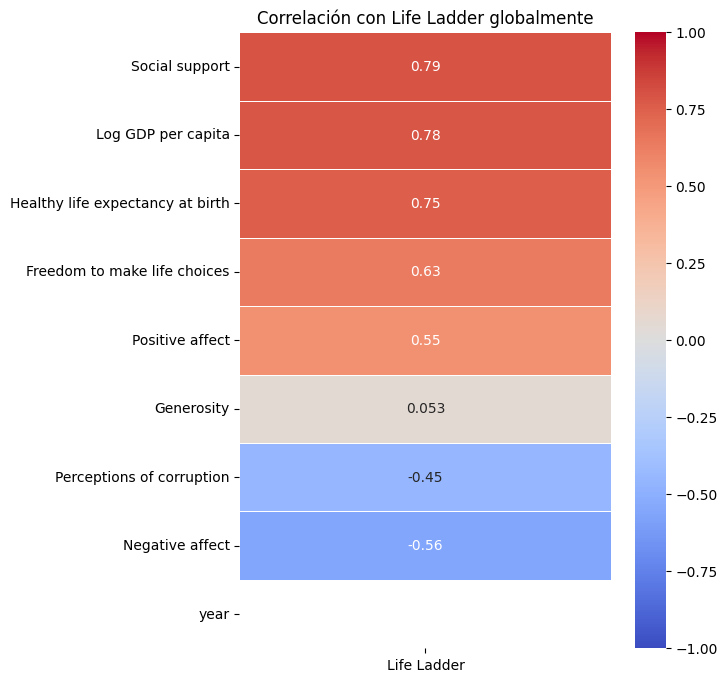

In [72]:
# Calcular las correlaciones
correlation_with_target = df.drop('Country name',axis=1).corr()["Life Ladder"].drop("Life Ladder").sort_values(ascending=False)  # Excluir la diagonal (1.0)

# Crear un heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(correlation_with_target.to_frame(), 
            annot=True, 
            cmap="coolwarm", 
            cbar=True, 
            vmin=-1, vmax=1, 
            linewidths=0.5)

# Añadir títulos
plt.title("Correlación con Life Ladder globalmente")
plt.show()

posx and posy should be finite values
posx and posy should be finite values


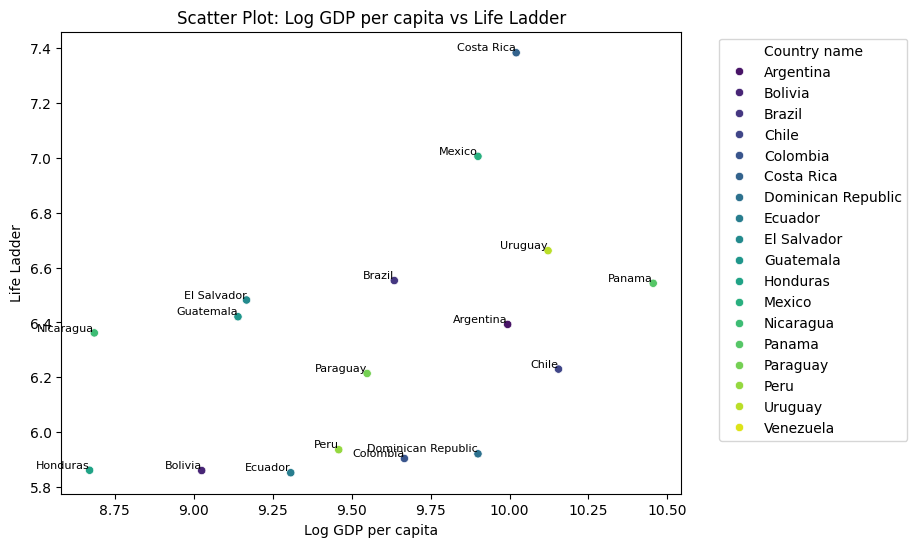

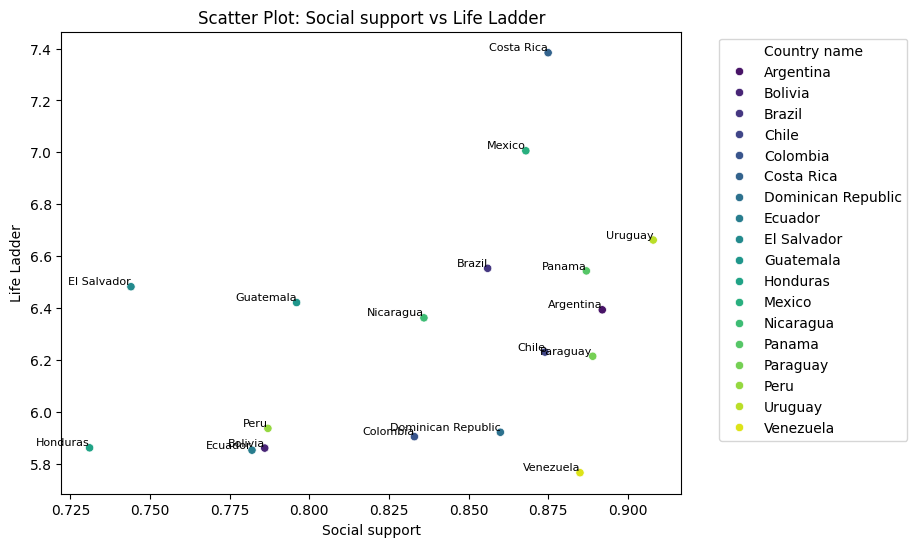

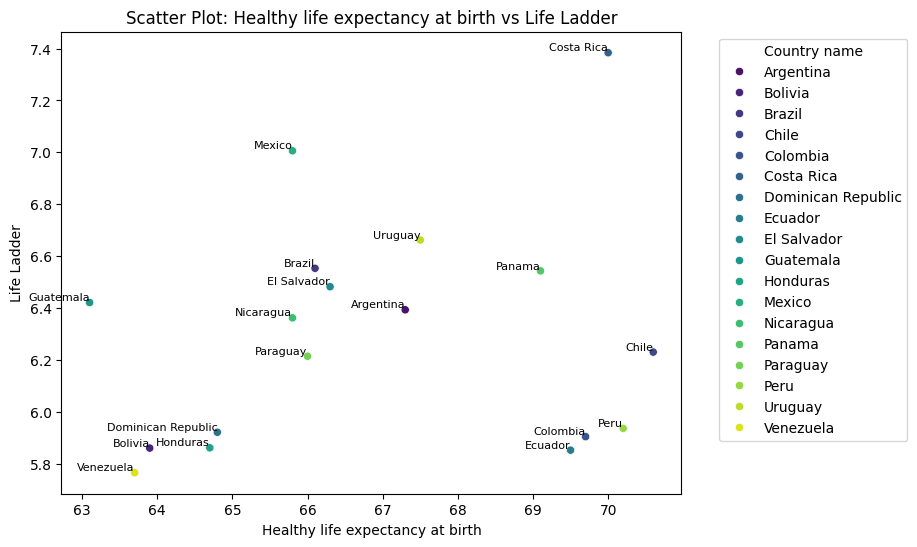

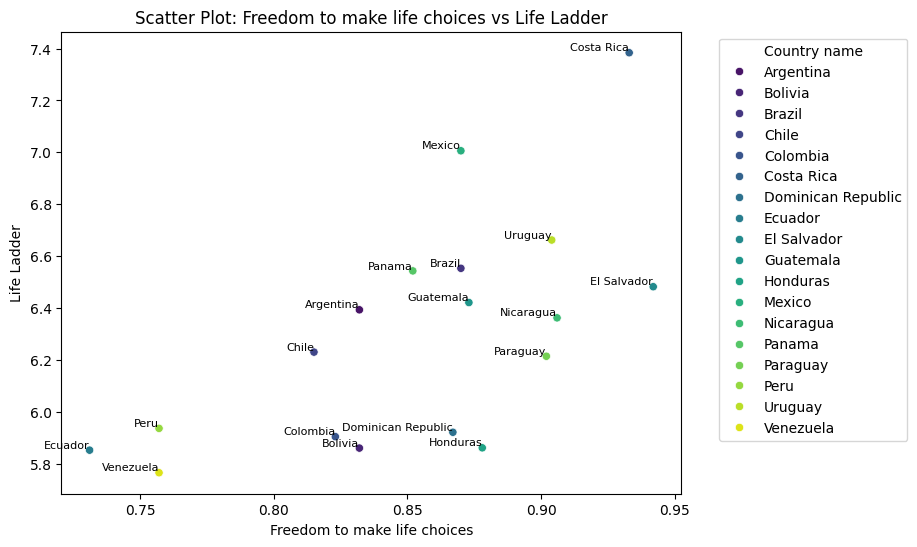

posx and posy should be finite values
posx and posy should be finite values


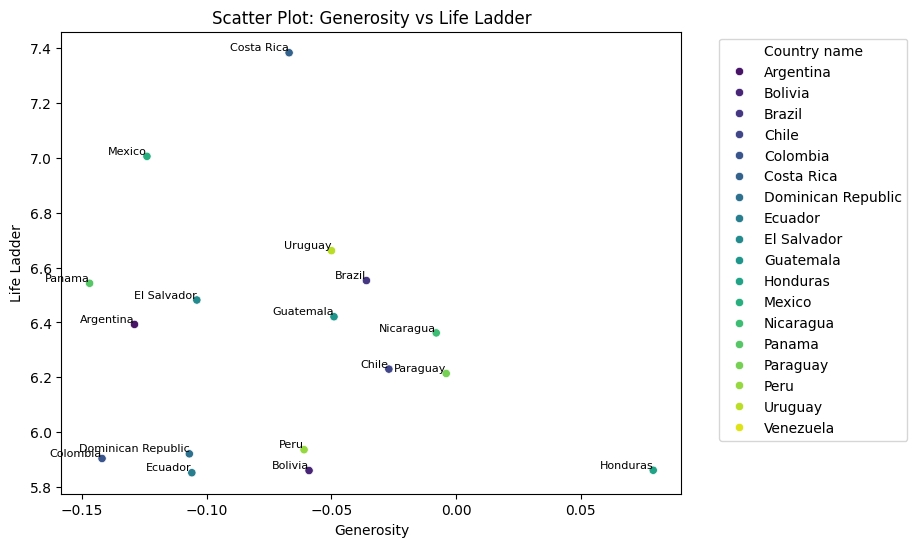

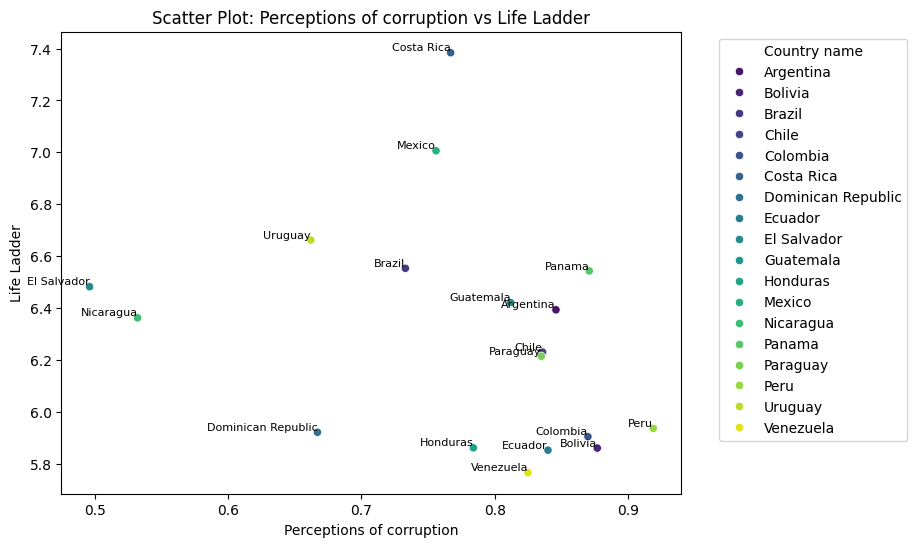

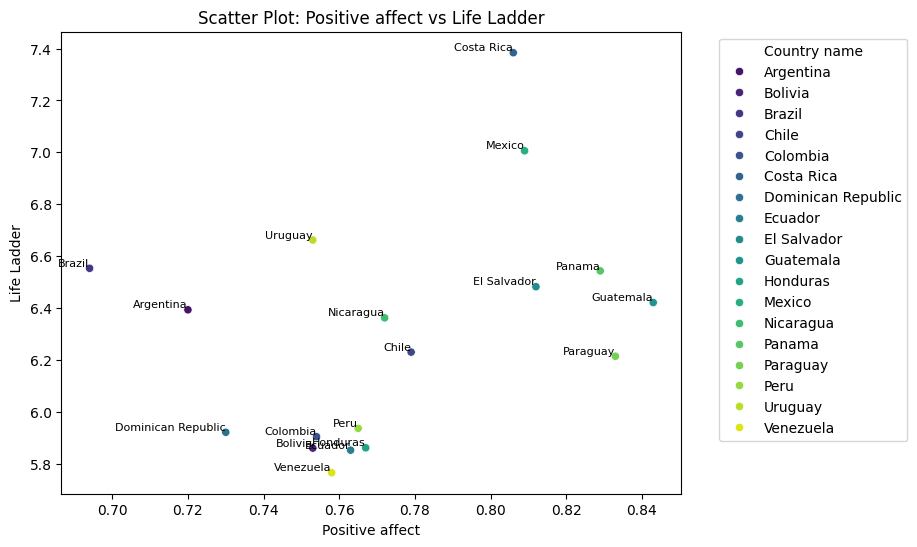

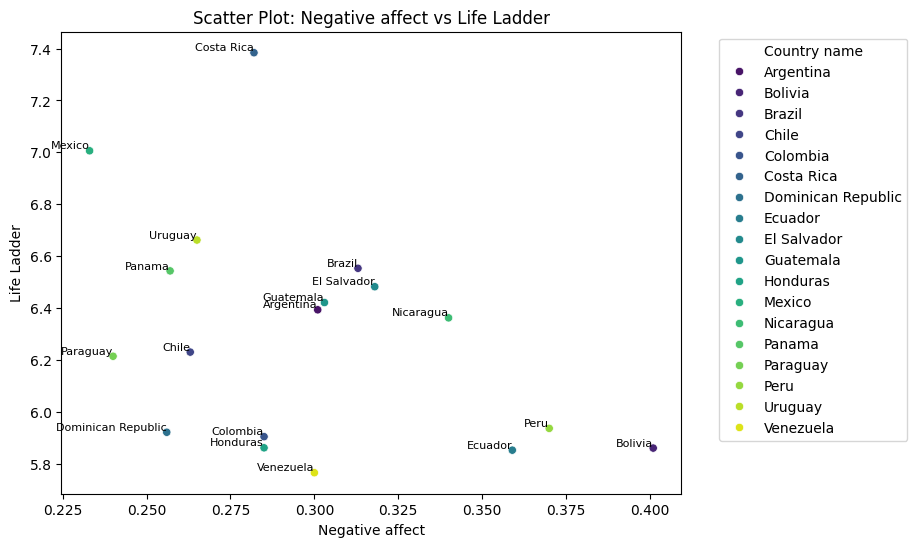

In [3]:
# Suponiendo que 'df' es tu DataFrame y 'target_column' es la columna con la que quieres graficar
target_column = 'Life Ladder'

# Iterar sobre todas las columnas del DataFrame
for column in latam.columns:
    if (column != target_column and column != 'Country name'):  # No graficar la columna objetivo contra sí misma
        # Crear una nueva figura para cada gráfico
        plt.figure(figsize=(8, 6))
        
        # Crear el scatter plot con seaborn
        sns.scatterplot(x=latam[column], y=latam[target_column],hue=latam['Country name'], palette='viridis')
        
        # Añadir etiquetas y título
        plt.xlabel(column)
        plt.ylabel(target_column)
        plt.title(f'Scatter Plot: {column} vs {target_column}')
        plt.legend(title='Country name', bbox_to_anchor=(1.05, 1), loc='upper left')

        for i in range(len(latam)):
            plt.text(latam[column].iloc[i], latam[target_column].iloc[i], latam['Country name'].iloc[i], fontsize=8, ha='right', va='bottom')
        
        # Mostrar el gráfico
        plt.show()


                            OLS Regression Results                            
Dep. Variable:       Q("Life Ladder")   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     1.935
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.185
Time:                        17:32:54   Log-Likelihood:               -0.24411
No. Observations:                  17   AIC:                             18.49
Df Residuals:                       8   BIC:                             25.99
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/home/juancho/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


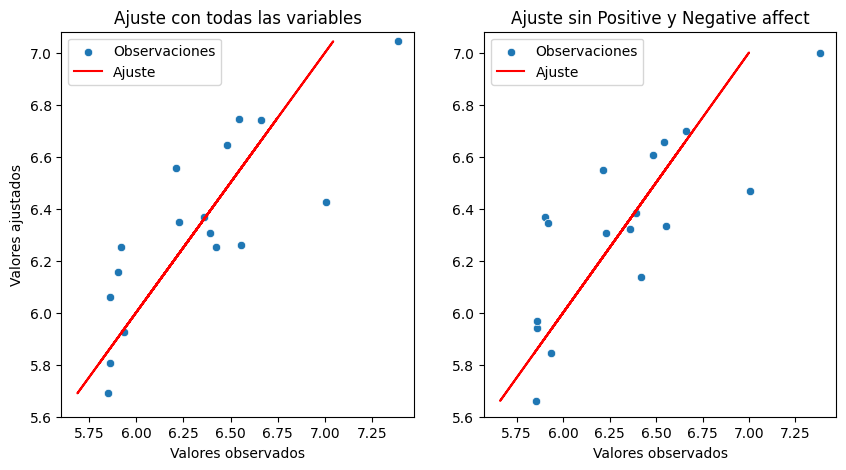

In [110]:
plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
lm = ols('Q("Life Ladder") ~ Q("Log GDP per capita") + Q("Social support") + Q("Healthy life expectancy at birth") + Q("Freedom to make life choices") + Q("Generosity") + Q("Perceptions of corruption") + Q("Positive affect") + Q("Negative affect")', data=latam).fit()
sns.scatterplot(x=latam['Life Ladder'], y=lm.fittedvalues, label='Observaciones')
plt.plot(lm.fittedvalues,lm.fittedvalues, color='red', label='Ajuste')
plt.xlabel('Valores observados')
plt.ylabel('Valores ajustados')
plt.ylim(5.6,7.08)
plt.title('Ajuste con todas las variables')
plt.legend()

print(lm.summary())

plt.subplot(1, 2, 2)
lm = ols('Q("Life Ladder") ~ Q("Log GDP per capita") + Q("Social support") + Q("Healthy life expectancy at birth") + Q("Freedom to make life choices") + Q("Generosity") + Q("Perceptions of corruption")', data=latam).fit()
sns.scatterplot(x=latam['Life Ladder'], y=lm.fittedvalues, label='Observaciones')
plt.plot(lm.fittedvalues,lm.fittedvalues, color='red', label='Ajuste')
plt.xlabel('Valores observados')
plt.ylabel('')
plt.ylim(5.6,7.08)
plt.title('Ajuste sin Positive y Negative affect')
plt.legend()

                            OLS Regression Results                            
Dep. Variable:       Q("Life Ladder")   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     2.623
Date:                Mon, 09 Dec 2024   Prob (F-statistic):             0.0856
Time:                        17:45:21   Log-Likelihood:                -1.3608
No. Observations:                  17   AIC:                             16.72
Df Residuals:                      10   BIC:                             22.55
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/home/juancho/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


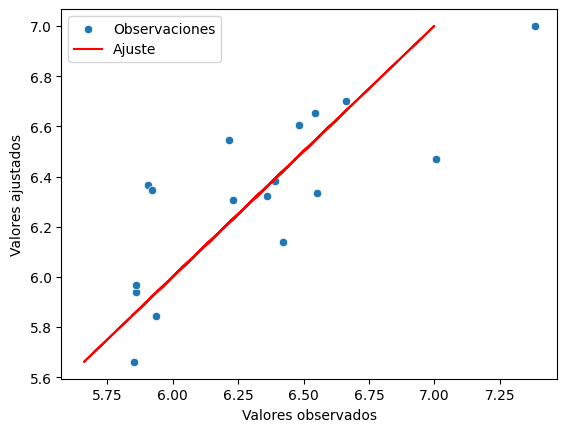

In [111]:
lm = ols('Q("Life Ladder") ~ Q("Log GDP per capita") + Q("Social support") + Q("Healthy life expectancy at birth") + Q("Freedom to make life choices") + Q("Generosity") + Q("Perceptions of corruption")', data=latam).fit()
sns.scatterplot(x=latam['Life Ladder'], y=lm.fittedvalues, label='Observaciones')
plt.plot(lm.fittedvalues,lm.fittedvalues, color='red', label='Ajuste')
plt.xlabel('Valores observados')
plt.ylabel('Valores ajustados')

plt.legend()
print(lm.summary())